In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()


In [3]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

conn.commit()


In [4]:
cursor.executemany("""
INSERT INTO sales VALUES (?, ?, ?)
""", [
    ("Laptop", 5, 50000),
    ("Mobile", 10, 20000),
    ("Tablet", 7, 30000),
    ("Headphones", 15, 2000)
])

conn.commit()


In [5]:
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""


In [6]:
df = pd.read_sql_query(query, conn)
print(df)


      product  total_qty   revenue
0  Headphones         15   30000.0
1      Laptop          5  250000.0
2      Mobile         10  200000.0
3      Tablet          7  210000.0


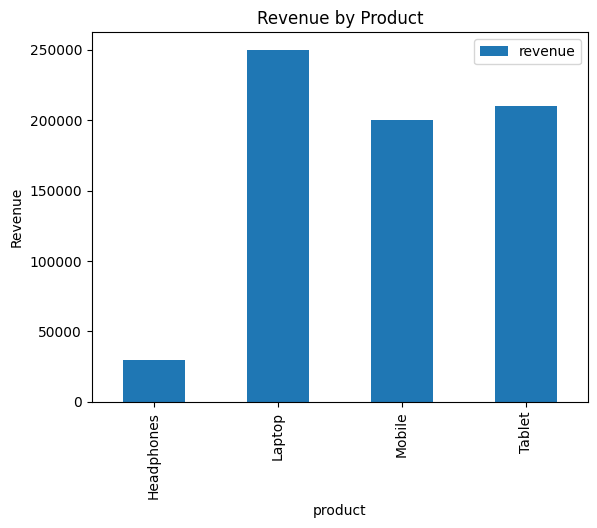

In [7]:
df.plot(kind='bar', x='product', y='revenue')
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.show()


In [8]:
plt.savefig("sales_chart.png")


<Figure size 640x480 with 0 Axes>

In [9]:
conn.close()


**Observation:**
Laptops generated the highest revenue, while headphones had the highest quantity sold.
